In [3]:
import sys
# please insert the glycompare to the PATH
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')

In [2]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns

import json_utility
# import __init__
# import initiator
# import glycan_io
# import plot_glycan_utilities
from glycompare import *
import glypy
%matplotlib inline


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019




In [2]:
import glycan_io

ImportError: attempted relative import with no known parent package

In [3]:
import re


# setting

In [4]:
glypy2mk = {'GlcNAc': 'bNG',
            'adMan': 'aM',
            'bdMan': 'bM',
            'Fuc': 'aF',
            'Neu5Ac': 'aNN',
            'Gal': 'bA',}
glypy2pos = {'GlcNAc': 1,
          'adMan': 1,
          'bdMan': 1,
          'Fuc': 1,
          'Neu5Ac': 2,
          'Gal': 1}

mk2glypy = {'aF': 'Fuc',
 'aM': 'adMan',
 'aNN': 'Neu5Ac',
 'bA': 'Gal',
 'bM': 'bdMan',
 'bNG': 'GlcNAc'}

monosaccharides_dic = glypy.monosaccharides

# Copy from glypy
https://github.com/mobiusklein/glypy/blob/master/docs/Quickstart.ipynb

In [5]:
# glcnac1 = monosaccharides_dic["GlcNAc"]
# glcnac2 = monosaccharides_dic["GlcNAc"]

# glcnac1.add_monosaccharide(glcnac2, position=4, child_position=1)
# bdman = monosaccharides["bdMan"]
# glcnac2.add_monosaccharide(bdman, position=4, child_position=1)
# adman1 = monosaccharides["adMan"]
# bdman.add_monosaccharide(adman1, position=3, child_position=1)
# adman2 = monosaccharides["adMan"]
# bdman.add_monosaccharide(adman2, position=6, child_position=1)

# n_linked_core = glypy.Glycan(root=glcnac1)
# n_linked_core.reindex(hard=True)
# n_linked_core.canonicalize()
# print(n_linked_core)
# print(n_linked_core.mass())
# print(n_linked_core.total_composition())

In [6]:
type(monosaccharides_dic["bdMan"])

glypy.structure.monosaccharide.Monosaccharide

In [7]:
glypy.monosaccharides["GlcNac"]

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

In [8]:
def translate_mkov2glypy(temp_str, test_mode=False):
    if temp_str[0] != '(' and temp_str[-5] != ')':
        temp_str='(' + temp_str[:-4]+')'+temp_str[-4:]
    elif temp_str[0] == '(' and temp_str[-5] == ')':
        pass
    else:
        assert False, 'The string doesn\'t follow the format'
    
    mono_re = re.compile(r"(?P<position>[2-6])(?P<mono_mkv>[a-z][A-Z]+)")
    braket_degree=0
    temp_str=temp_str[::-1]
    glycan_list = []
    degree_list = []
    group_list = []
    while len(temp_str) != 0:
        if test_mode:
            print(temp_str[::-1])
        if temp_str[:5] == "nsA;)":
            temp_str=temp_str[5:]
        elif temp_str[:2] == "NG":
            glycan_list.append((glypy.monosaccharides["GlcNac"], -1))
            degree_list.append(braket_degree)
            temp_str=temp_str[2:]
        elif temp_str[0] == ")":
            braket_degree+=1
    #         group_category = max(degree_list)+1
            temp_str=temp_str[1:]
        elif temp_str[0] =="(":

    #         group_category=
            temp_str=temp_str[1:]
            #合并同类项
            i=len(degree_list)-1
#             print(i)
#             print(len(degree_list), len(degree_list))
            while degree_list[i-1] == braket_degree and i>1:
                if test_mode:  
                    print(glycan_list[i-1][0])
                    print(glycan_list[i][0])
    #             glycan_list[i-1][0]
    #             if glycan_list[i][0]
                glycan_list[i-1][0].add_monosaccharide(glycan_list[i][0], 
                                                       position=glycan_list[i][1], 
                                                       child_position=glycan_list[i][2])
                degree_list.pop()
                glycan_list.pop()
                i-=1
            glycan_list[i-1][0].add_monosaccharide(glycan_list[i][0], 
                                                   position=glycan_list[i][1], 
                                                   child_position=glycan_list[i][2])
            degree_list.pop()
            glycan_list.pop()
            braket_degree-=1
        elif mono_re.match(temp_str):
            _match = mono_re.match(temp_str)
            temp_str = temp_str[_match.end():]
            glycan_list.append((glypy.monosaccharides[mk2glypy[_match.group('mono_mkv')]], 
                                int(_match.group('position')),
                                int(glypy2pos[mk2glypy[_match.group('mono_mkv')]])))
            degree_list.append(braket_degree)
        else:
            print("?", temp_str[:5])
            break
#     plot_glycan_utilities.plot_glycan()
    return glypy.Glycan(root=glycan_list[0][0])

In [9]:
translate_mkov2glypy(temp_str="(Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2(NNa3Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2(Ab4GNb4)Ma3(NNa3Ab4GNb2(NNa3Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(Ab4GNb2(NNa3Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2(Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN);Asn")
translate_mkov2glypy(temp_str="(Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2Ma3(NNa3Ab4GNb2Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(Ab4GNb2(Ab4GNb4)Ma3(Ab4GNb2(Ab4GNb3Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(GNb2Ma3(GNb2(GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")


RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
5b:b-dman-HEX-1:5
6b:a-dman-HEX-1:5
7b:b-dglc-HEX-1:5
8s:n-acetyl
9b:a-dman-HEX-1:5
10b:b-dglc-HEX-1:5
11s:n-acetyl
12b:b-dglc-HEX-1:5
13s:n-acetyl
14b:a-lgal-HEX-1:5|6:d
LIN
1:1d(2+1)2n
2:1o(4+1)3d
3:3d(2+1)4n
4:3o(4+1)5d
5:5o(3+1)6d
6:6o(2+1)7d
7:7d(2+1)8n
8:5o(6+1)9d
9:9o(2+1)10d
10:10d(2+1)11n
11:9o(6+1)12d
12:12d(2+1)13n
13:1o(6+1)14d

In [10]:
import glycompare.glycan_io


In [11]:
glycan_dict = glycan_io.load_glycan_dict_from_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_glycoct_dict.json')

In [12]:
glycan_dict.keys()

dict_keys(['1375.1', '1417.1', '1580.1', '1591.1', '1662.1', '1754.1', '1795.1', '1836.1', '2040.2', '2040.1', '2070.1', '2081.2', '2081.1', '2156.1', '2244.2', '2244.1', '2244.3', '2285.1', '2326.1', '2401.1', '2401.2', '2489.1', '2530.1', '2605.3', '2605.1', '2605.4', '2605.2', '2605.5', '2646.1', '2693.5', '2693.3', '2693.4', '2693.1', '2734.1', '2792.1', '2892.1', '2939.1', '2967.2', '2967.1', '2967.3', '3055.2', '3055.3', '3055.1', '3055.4', '3096.1', '3143.2', '3212.1', '3242.2', '3388.1', '3416.5', '3416.3', '3416.1', '3416.4', '3416.2', '3457.1', '3504.1', '3504.3', '3504.2', '3592.2', '3605.1', '3661.1', '3777.1', '3777.2', '3865.1', '3865.2', '3865.3', '3953.1', '4022.1', '4041.1', '4052.1', '4226.3', '4226.2', '4226.1', '4314.1', '4402.1', '4413.1', '4490.1', '4587.1', '4675.2', '4675.3', '4675.1', '4763.1', '4851.1', '4862.1', '5037.2', '5037.1', '5312.1', '5486.2', '5486.1'])

In [13]:
glycan_dict['5312.1'].root.children()
glycan_dict = glycan_io.load_glycan_dict_from_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_glycoct_dict.json')
# substructure_vec = glycan_io.load_glycan_dict_from_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_substructure_glycoct_dict.json')

In [14]:
# for i in substructure_vec[:6]:
#     print(i)
# plot_glycan_utilities.plot_glycan_list(substructure_vec[:6])

In [15]:
"RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n"

glypy2mk = {'GlcNAc': 'bNG',
            'adMan': 'aM',
            'bdMan': 'bM',
            'Fuc': 'aF',
            'Neu5Ac': 'aNN',
            'Gal': 'bA',}
glypy2pos = {'GlcNAc': 1,
          'adMan': 1,
          'bdMan': 1,
          'Fuc': 1,
          'Neu5Ac': 2,
          'Gal': 1}


In [16]:
# def get_mono():
#     if i.find("a-dgro-dgal-NON-2:6|1:a|2:keto|3:d") !=-1:
#         return 'aNN'
#     elif i.find("1b:a-lgal-HEX-1:5|6:d")!=-1:
#         return 'aF'
#     elif i.find("-dglc-HEX-1:5")!=-1 and i.find('n-acetyl')!=-1:
#         return 'bNG'
#     elif i.find("")

glycan_dict['5486.1'].root.children()


[(4, RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n),
 (6, RES 1b:a-lgal-HEX-1:5|6:d)]

RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
bNG
RES 1b:a-lgal-HEX-1:5|6:d
aF
RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
bNG
RES 1b:b-dman-HEX-1:5
bM
RES 1b:a-dman-HEX-1:5
aM
RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
bNG
RES 1b:b-dgal-HEX-1:5
bA
RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
bNG
RES 1b:b-dgal-HEX-1:5
bA
RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
bNG
RES 1b:b-dgal-HEX-1:5
bA
RES 1b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d 2s:n-acetyl LIN 1:1d(5+1)2n
aNN
RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
bNG
RES 1b:b-dgal-HEX-1:5
bA
RES 1b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d 2s:n-acetyl LIN 1:1d(5+1)2n
aNN
RES 1b:a-dman-HEX-1:5
aM
RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
bNG
RES 1b:b-dgal-HEX-1:5
bA
RES 1b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d 2s:n-acetyl LIN 1:1d(5+1)2n
aNN
RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
bNG
RES 1b:b-dgal-HEX-1:5
bA
RES 1b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d 2s:n-acetyl LIN 1:1d(5+1)2n
aNN
NNa3Ab4GNb2(NNa3Ab

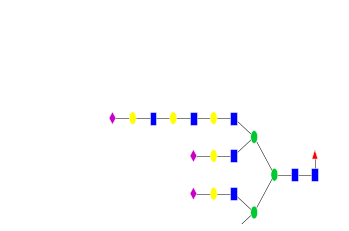

In [17]:
# glycan_dict['5486.1']
    

mono2markov = {'RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n':'bNG',
               'RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n':'bNG',
               'RES 1b:b-dman-HEX-1:5':'bM',
               'RES 1b:a-dman-HEX-1:5':'aM',
               'RES 1b:b-dgal-HEX-1:5':'bA',
               'RES 1b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d 2s:n-acetyl LIN 1:1d(5+1)2n':'aNN',
               'RES 1b:a-lgal-HEX-1:5|6:d':'aF',
              }
for i in glycan_dict['5486.1'].index:
    print(i)
    print(mono2markov[str(i)])

def _glycoct2markov(a_mono):
    children = a_mono.children()
    children = sorted(children, key=lambda x:x[0], reverse=True)
#     print(children)
    _str=''
    if len(children) == 1:
        index, mono = children[0]
        return  str(index) + mono2markov[str(mono)] + _glycoct2markov(mono)
    elif len(children) > 1:
        for index, mono in list(children)[:-1]:
            _str += ')'+str(index)+mono2markov[str(mono)]+ _glycoct2markov(mono)+'('
        index, mono = children[-1]
#         print(index, mono)
        _str += str(index) + mono2markov[str(mono)] + _glycoct2markov(mono)
        return _str
    else:
        return ''
    
def glycoct2markov(a_glycan):
    a = 'nsA;NG'+_glycoct2markov(a_glycan.root)
    
    return a[::-1]
plot_glycan_utilities.plot_glycan(glycan_dict['5486.1'])
print(glycoct2markov(glycan_dict['5486.1']))

In [18]:
translate_mkov2glypy(glycoct2markov(glycan_dict['5486.1']))

RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
5b:b-dman-HEX-1:5
6b:a-dman-HEX-1:5
7b:b-dglc-HEX-1:5
8s:n-acetyl
9b:b-dgal-HEX-1:5
10b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
11s:n-acetyl
12b:b-dglc-HEX-1:5
13s:n-acetyl
14b:b-dgal-HEX-1:5
15b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
16s:n-acetyl
17b:a-dman-HEX-1:5
18b:b-dglc-HEX-1:5
19s:n-acetyl
20b:b-dgal-HEX-1:5
21b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
22s:n-acetyl
23b:b-dglc-HEX-1:5
24s:n-acetyl
25b:b-dgal-HEX-1:5
26b:b-dglc-HEX-1:5
27s:n-acetyl
28b:b-dgal-HEX-1:5
29b:b-dglc-HEX-1:5
30s:n-acetyl
31b:b-dgal-HEX-1:5
32b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
33s:n-acetyl
34b:a-lgal-HEX-1:5|6:d
LIN
1:1d(2+1)2n
2:1o(4+1)3d
3:3d(2+1)4n
4:3o(4+1)5d
5:5o(3+1)6d
6:6o(2+1)7d
7:7d(2+1)8n
8:7o(4+1)9d
9:9o(3+2)10d
10:10d(5+1)11n
11:6o(4+1)12d
12:12d(2+1)13n
13:12o(4+1)14d
14:14o(3+2)15d
15:15d(5+1)16n
16:5o(6+1)17d
17:17o(2+1)18d
18:18d(2+1)19n
19:18o(4+1)20d
20:20o(3+2)21d
21:21d(5+1)22n
22:17o(6+1)23d
23:23d(2+1)24n
24:23o(4+1)25d
25:25o(3+1)

In [19]:
import pandas as pd
from  glypy.io.linear_code import glycan_to_linear_code, dumps, loads

a=list(glycan_dict.keys())
_new_glycan_dict = {}
# a_series = pd.Series()
b_series= []
import difflib

for i in a:
#     print(i)
#     try:
#         assert str(glycan_dict[i][9:]) == str(translate_mkov2glypy(glycoct2markov(glycan_dict[i]))[9:]), i
#         b = difflib.ndiff(str(glycan_dict[i]), 
#                                str(translate_mkov2glypy(glycoct2markov(glycan_dict[i]))))
#         b = [li for li in difflib.ndiff(str(glycan_dict[i]), str(translate_mkov2glypy(glycoct2markov(glycan_dict[i])))) if li[0] != ' ']
#         _str = str(glycoct2markov(glycan_dict[i]))
#         print(_str)
#         if b:
#             print(i)
#             print(b)
            

        _linear_code = glycoct2markov(glycan_dict[i])
        b = [li for li in difflib.ndiff(str(loads(glycoct2markov(glycan_dict[i])[:-4])),
                                        str(glycan_dict[i])) if li[0] != ' ']
        if b:
            print(i)
            print(b)
        _new_glycan_dict[i] = loads(_linear_code[:-4])
#     except:
#         print(i)
#         print(str(glycan_dict[i])[9:])
#         print(str(translate_mkov2glypy(glycoct2markov(glycan_dict[i])))[9:])
#         print(output_list)
# #         plot_glycan_utilities.plot_glycan(glycan_dict[i], title=i,label=True)
#         plot_glycan_utilities.plot_glycan(translate_mkov2glypy(glycoct2markov(glycan_dict[i])), title=i, label=True)

_new_glycan_dict
# pd.DataFrame(data={'id':a,'iupac':b_series}).to_excel('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/linear_str.xlsx')

{'1375.1': RES
 1b:x-dglc-HEX-1:5
 2s:n-acetyl
 3b:b-dglc-HEX-1:5
 4s:n-acetyl
 5b:b-dman-HEX-1:5
 6b:a-dman-HEX-1:5
 7b:a-dman-HEX-1:5
 8b:a-dman-HEX-1:5
 LIN
 1:1d(2+1)2n
 2:1o(4+1)3d
 3:3d(2+1)4n
 4:3o(4+1)5d
 5:5o(3+1)6d
 6:5o(6+1)7d
 7:7o(6+1)8d, '1417.1': RES
 1b:x-dglc-HEX-1:5
 2s:n-acetyl
 3b:b-dglc-HEX-1:5
 4s:n-acetyl
 5b:b-dman-HEX-1:5
 6b:a-dman-HEX-1:5
 7b:b-dglc-HEX-1:5
 8s:n-acetyl
 9b:a-dman-HEX-1:5
 LIN
 1:1d(2+1)2n
 2:1o(4+1)3d
 3:3d(2+1)4n
 4:3o(4+1)5d
 5:5o(3+1)6d
 6:6o(2+1)7d
 7:7d(2+1)8n
 8:5o(6+1)9d, '1580.1': RES
 1b:x-dglc-HEX-1:5
 2s:n-acetyl
 3b:b-dglc-HEX-1:5
 4s:n-acetyl
 5b:b-dman-HEX-1:5
 6b:a-dman-HEX-1:5
 7b:a-dman-HEX-1:5
 8b:a-dman-HEX-1:5
 9b:a-dman-HEX-1:5
 LIN
 1:1d(2+1)2n
 2:1o(4+1)3d
 3:3d(2+1)4n
 4:3o(4+1)5d
 5:5o(3+1)6d
 6:5o(6+1)7d
 7:7o(3+1)8d
 8:7o(6+1)9d, '1591.1': RES
 1b:x-dglc-HEX-1:5
 2s:n-acetyl
 3b:b-dglc-HEX-1:5
 4s:n-acetyl
 5b:b-dman-HEX-1:5
 6b:a-dman-HEX-1:5
 7b:b-dglc-HEX-1:5
 8s:n-acetyl
 9b:a-dman-HEX-1:5
 10b:a-lgal-HEX-1:5|6

In [20]:
# from glycompare import glycan_io
# glycan_io.output_glycan_dict_to_glycoct_dir(_new_glycan_dict, '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/source_data/glycoct/')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/source_data/glycoct/1375.1.glycoct_condensed'

In [ ]:
# for i in glycan_dict:
#     print(dumps(glycan_dict[i]))
# # dumps(glycan_dict['2401.1'])
# # loads('Fa6(Ma6(GNb4(NNa3Ab4GNb2)Ma3)Mb4GNb4)GN')

In [ ]:
# today's todo:
    # to generate a substructure list, 
    # annotate network when james's network comes.
    # 
    

In [25]:
substructure_glycoct_dict_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/substructure_with_core.json'
substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)

In [26]:
type(substructure_dict)

list

In [30]:
linear_list = []
for i in substructure_dict:
    linear_list.append(glycoct2markov(i)[:-4])

In [31]:
json_utility.store_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/substructure_with_core_linear.json', linear_list)


In [ ]:
# link_pattern = re.compile(
#     r'''
#     \(
#     (?P<parent_residue_index>\d+)
#     \)
#     (?P<parent_atom_replaced>[odhnx])
#     \((?P<parent_attachment_position>-?[0-9\-\|]+)
#     [\+\-]
#     (?P<child_attachment_position>-?[0-9\-\|]+)
#     \)
#     (?P<child_atom_replaced>[odhnx])
#     \((?P<child_residue_index>\d+)\)
#     \[
#     (?P<residual>[odhnx])
#     \]
#         ''', re.VERBOSE)
# _match = link_pattern.match("(1)o(4+1)d(3)[x]")
# print(_match.group('parent_residue_index'))
# print(_match.group('child_residue_index'))
# print(_match.group('parent_attachment_position'))
# print(_match.group('child_attachment_position'))
# (_match.group('parent_residue_index'), _match.group('child_residue_index'), _match.group('parent_attachment_position'),_match.group('child_attachment_position'))